In [1]:
import pprint
import numpy as np

from sklearn.linear_model import *
from lineartree import LinearTreeClassifier, LinearTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import make_classification, make_regression

import warnings
warnings.simplefilter('ignore')

# Regression

In [2]:
X, y = make_regression(n_samples=5000, n_features=10,
                       n_informative=3, n_targets=1,
                       random_state=0, shuffle=False)

t = X[:,0] > np.quantile(X[:,0], 0.5)
y[t] += X[t][:,3]*X[t][:,4]
y[~t] += X[~t][:,1]*X[~t][:,2]

t = X[:,5] > np.quantile(X[:,5], 0.7)
y[t] += X[t][:,6]*X[t][:,7]
y[~t] += X[~t][:,8]*X[~t][:,9]

X.shape, y.shape

((5000, 10), (5000,))

### default configuration 

In [3]:
regr = LinearTreeRegressor(LinearRegression(), criterion='mse')
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression())

In [4]:
regr.feature_importances_

array([0.        , 0.15034397, 0.17039825, 0.163223  , 0.        ,
       0.        , 0.        , 0.        , 0.12494124, 0.39109354])

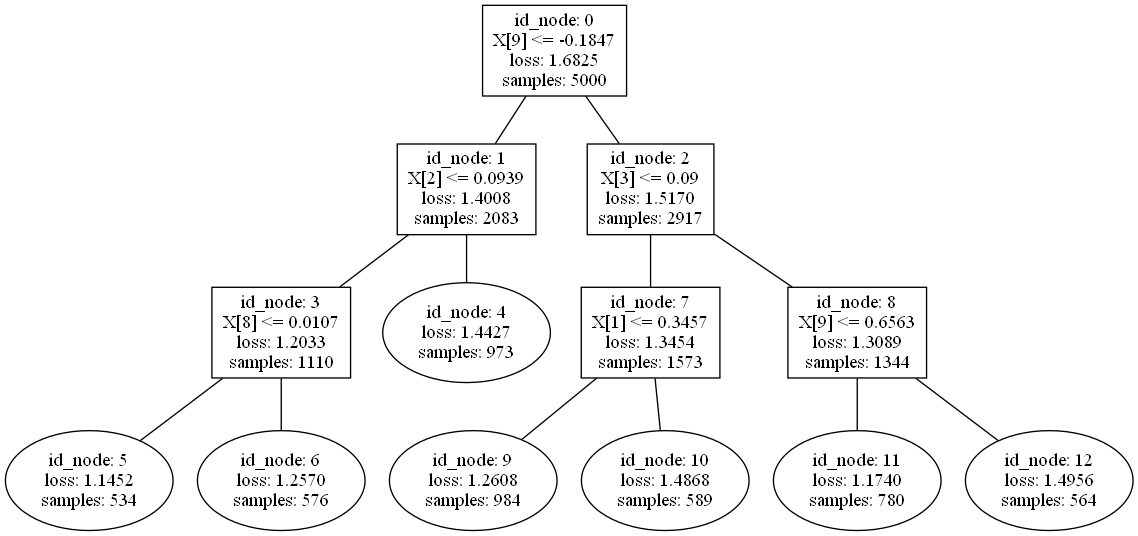

In [5]:
regr.plot_model()

In [6]:
pprint.pprint(regr.summary())

{0: {'children': (1, 2),
     'col': 9,
     'loss': 1.6825,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 5000,
     'th': -0.1847},
 1: {'children': (3, 4),
     'col': 2,
     'loss': 1.4008,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 2083,
     'th': 0.0939},
 2: {'children': (7, 8),
     'col': 3,
     'loss': 1.517,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 2917,
     'th': 0.09},
 3: {'children': (5, 6),
     'col': 8,
     'loss': 1.2033,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 1110,
     'th': 0.0107},
 4: {'loss': 1.4427, 'models': LinearRegression(), 'samples': 973},
 5: {'loss': 1.1452, 'models': LinearRegression(), 'samples': 534},
 6: {'loss': 1.257, 'models': LinearRegression(), 'samples': 576},
 7: {'children': (9, 10),
     'col': 1,
     'loss': 1.3454,
     'models': (LinearRegression(), LinearRegression()),
     'samples': 1573,
     'th': 0.3457}

In [7]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 13), 0.9998658336604529)

### using linear_features

In [8]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    linear_features=[0,1,2]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    linear_features=[0, 1, 2])

In [9]:
regr.feature_importances_

array([0.32123933, 0.22884731, 0.40982092, 0.01760752, 0.        ,
       0.        , 0.        , 0.02248492, 0.        , 0.        ])

In [10]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998467954755095)

### using split_features

In [11]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    split_features=[0,1,2,3,4]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    split_features=[0, 1, 2, 3, 4])

In [12]:
regr.feature_importances_

array([0.677754  , 0.        , 0.10825931, 0.10132904, 0.11265766,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [13]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998658407317467)

### using linear_features + split_features

In [14]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    linear_features=[0,1,2,5,6],
    split_features=[0,1,2,3,4]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    linear_features=[0, 1, 2, 5, 6],
                    split_features=[0, 1, 2, 3, 4])

In [15]:
regr.feature_importances_

array([0.31934282, 0.24955886, 0.40197823, 0.02912008, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [16]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998477419452902)

### using linear_features + split_features + categorical_features

In [17]:
regr = LinearTreeRegressor(
    LinearRegression(), criterion='mse',
    linear_features=[0,1,2,5,6],
    split_features=[0,1,3],
    categorical_features=[3,7]
)
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(),
                    categorical_features=[3, 7],
                    linear_features=[0, 1, 2, 5, 6], split_features=[0, 1, 3])

In [18]:
regr.feature_importances_

array([0.29752015, 0.66369037, 0.        , 0.03878948, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [19]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998453110456013)

### mae criterion

In [20]:
regr = LinearTreeRegressor(LinearRegression(), criterion='mae')
regr.fit(X, y)

LinearTreeRegressor(base_estimator=LinearRegression(), criterion='mae')

In [21]:
regr.feature_importances_

array([0.12267598, 0.        , 0.13440084, 0.26153398, 0.        ,
       0.        , 0.        , 0.        , 0.1401937 , 0.3411955 ])

In [22]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), 0.9998700610273442)

### poisson criterion 

In [23]:
regr = LinearTreeRegressor(LinearRegression(), criterion='poisson')
regr.fit(X, np.abs(y))

LinearTreeRegressor(base_estimator=LinearRegression(), criterion='poisson')

In [24]:
regr.feature_importances_

array([0.84497362, 0.        , 0.        , 0.        , 0.        ,
       0.02035245, 0.06404561, 0.03695355, 0.        , 0.03367478])

In [25]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000,), (5000,), (5000, 15), -0.8826708363655023)

### multi-target regression with weights

In [26]:
X, y = make_regression(n_samples=5000, n_features=10,
                       n_informative=3, n_targets=2,
                       random_state=0, shuffle=False)

t = X[:,0] > np.quantile(X[:,0], 0.5)
y[np.ix_(t,[0])] += (X[t][:,3]*X[t][:,4]).reshape(-1,1)
y[np.ix_(~t,[0])] += (X[~t][:,1]*X[~t][:,2]).reshape(-1,1)

t = X[:,5] > np.quantile(X[:,5], 0.7)
y[np.ix_(t,[1])] += (X[t][:,6]*X[t][:,7]).reshape(-1,1)
y[np.ix_(~t,[1])] += (X[~t][:,8]*X[~t][:,9]).reshape(-1,1)

W = np.random.uniform(1,3, (X.shape[0],))

X.shape, y.shape

((5000, 10), (5000, 2))

In [27]:
regr = LinearTreeRegressor(LinearRegression(), criterion='mse')
regr.fit(X, y, W)

LinearTreeRegressor(base_estimator=LinearRegression())

In [28]:
regr.feature_importances_

array([0.        , 0.1470223 , 0.        , 0.30881021, 0.        ,
       0.        , 0.        , 0.        , 0.30423059, 0.2399369 ])

In [29]:
regr.predict(X).shape, regr.apply(X).shape, regr.decision_path(X).toarray().shape, regr.score(X,y)

((5000, 2), (5000,), (5000, 13), 0.9999120763442333)

# Hyperparameter Tuning

In [30]:
parameters = {'base_estimator__alpha':[1, 5, 10], 'max_depth':[3, 5, 10]}
search = GridSearchCV(LinearTreeRegressor(Ridge()), parameters, n_jobs=-1)
search.fit(X,y)

GridSearchCV(estimator=LinearTreeRegressor(base_estimator=Ridge()), n_jobs=-1,
             param_grid={'base_estimator__alpha': [1, 5, 10],
                         'max_depth': [3, 5, 10]})

In [31]:
search.best_params_

{'base_estimator__alpha': 1, 'max_depth': 3}

# Classification

In [32]:
X, y = make_classification(n_samples=8000, n_features=15, n_classes=3, 
                           n_redundant=4, n_informative=5,
                           n_clusters_per_class=1,
                           shuffle=True, random_state=33)

X.shape, y.shape

((8000, 15), (8000,))

### default configuration

In [33]:
clf = LinearTreeClassifier(RidgeClassifier(), criterion='hamming')
clf.fit(X, y)

LinearTreeClassifier(base_estimator=RidgeClassifier())

In [34]:
clf.feature_importances_

array([0.09379374, 0.24276051, 0.        , 0.42029795, 0.        ,
       0.        , 0.        , 0.11931671, 0.12383108, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

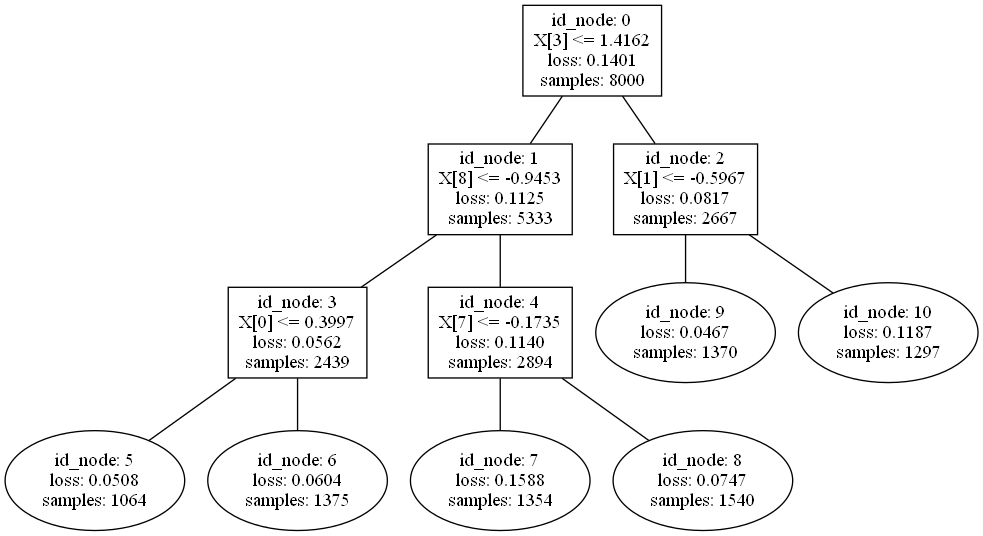

In [35]:
clf.plot_model()

In [36]:
pprint.pprint(clf.summary())

{0: {'children': (1, 2),
     'col': 3,
     'loss': 0.1401,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 8000,
     'th': 1.4162},
 1: {'children': (3, 4),
     'col': 8,
     'loss': 0.1125,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 5333,
     'th': -0.9453},
 2: {'children': (9, 10),
     'col': 1,
     'loss': 0.0817,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 2667,
     'th': -0.5967},
 3: {'children': (5, 6),
     'col': 0,
     'loss': 0.0562,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 2439,
     'th': 0.3997},
 4: {'children': (7, 8),
     'col': 7,
     'loss': 0.114,
     'models': (RidgeClassifier(), RidgeClassifier()),
     'samples': 2894,
     'th': -0.1735},
 5: {'classes': array([0, 1, 2]),
     'loss': 0.0508,
     'models': RidgeClassifier(),
     'samples': 1064},
 6: {'classes': array([0, 1, 2]),
     'loss': 0.0604,
     'models': RidgeClassifier(),
     '

In [37]:
clf.predict(X).shape, clf.predict_proba(X).shape, clf.apply(X).shape, clf.decision_path(X).toarray().shape, clf.score(X,y)

((8000,), (8000, 3), (8000,), (8000, 11), 0.914375)

### crossentropy criterion

In [38]:
clf = LinearTreeClassifier(LogisticRegression(), criterion='crossentropy')
clf.fit(X, y)

LinearTreeClassifier(base_estimator=LogisticRegression(),
                     criterion='crossentropy')

In [39]:
clf.feature_importances_

array([0.16432093, 0.14521428, 0.        , 0.17889238, 0.        ,
       0.        , 0.03135471, 0.        , 0.48021769, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [40]:
clf.predict(X).shape, clf.predict_proba(X).shape, clf.apply(X).shape, clf.decision_path(X).toarray().shape, clf.score(X,y)

((8000,), (8000, 3), (8000,), (8000, 13), 0.933375)